In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'April 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11
2017-04-30     1890   2390        243  395    0    10    123     260      31

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-04-30     -700    107        -41 -31   0    -1    -34     -38      20

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

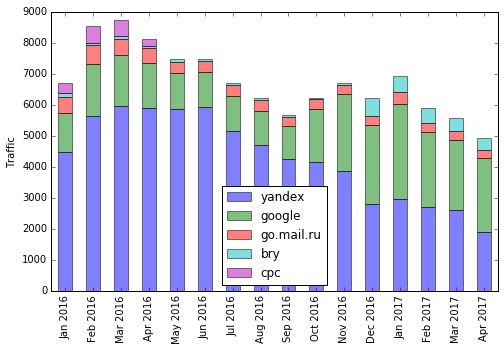

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

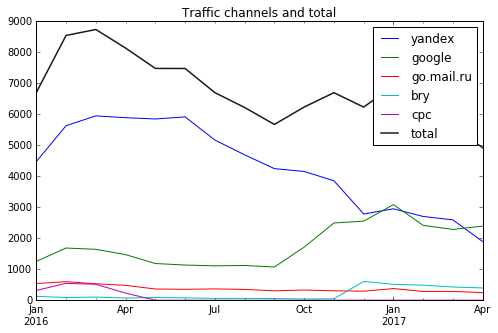

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [12]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                       двери с доставкой и установкой     32
       1                                   двери с фурнитурой     17
       2                                   двери межкомнатные     16
       3                                       двери недорого     15
       4                         межкомнатные двери с замками     14
       5                                   межкомнатные двери     13
       6                                    двери белорусские     12
       7                                       двери под ключ     11
       8                          магазин межкомнатных дверей     10
       9                        межкомнатные двери с зеркалом     10
       10                                         двери венге      9
       11                                   двери с капителью      9
       12                                    двери со скидкой      8
       13                               дешевые входные двери      8
       14                                          двери купе      7
       15                             интернет магазин дверей      7
       16                            купить ульяновские двери      7
       17                                         серые двери      7
       18                              входные двери недорого      6
       19                                   двери беленый дуб      6
       20                                      двери гармошка      6
       21                           двери ульяновские каталог      6
       22                                 двери эмалированные      6
       23               купить ульяновские межкомнатные двери      6
       24                                   ульяновские двери      6
       25              ульяновские двери межкомнатные каталог      6
       26                                               двери      5
       27                                         двери верда      5
       28                                        двери книжка      5
       29                                двери ламинированные      5
...                                                       ...    ...
yandex 809                        раздвижная дверь полотно 90      1
       810                            размер дверного полотна      1
       811                     размер дверного полотна 200х85      1
       812                   размер дверного полотна и проема      1
       813       размеры дверных полотен одностворчатой двери      1
       814                   раскладная дверь книжка на кухню      1
       815                         распродажа дверное полотно      1
       816                          салон дверей дверной двор      1
       817                      самые простые дверные полотна      1
       818                            сдвижные двери на кухню      1
       819             сделать фотопечать на кухонных дверцах      1
       820  сколько надо сделать дверной проем под полотно...      1
       821                     ставить или нет дверь на кухню      1
       822                  стандартный размер кухонной двери      1
       823                            стекло в кухонную дверь      1
       824                          стекло для двери на кухню      1
       825                    стеклянная дверь для кухни фото      1
       826             стоимость дверного полотна без коробки      1
       827         стоимость пвх дверного полотна для санузла      1
       828                   украшение в дверной проем купить      1
       829                ульяновские кухонные двери гармошка      1
       830  установка дверного полотна на старую коробку цена      1
       831                     фасадные двери для кухни 40х70      1
       832           фасадные двери для кухни купить в москве      1
       833                         цельногнутое полотно двери      1
       834                          часть от дверного полотна      1
       835                    чем красить мдф дверны

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [13]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери с доставкой и установкой,32
go.mail.ru,межкомнатные двери недорого,25
google,np - /,294
rambler,купить арку орфей,1
yahoo,np - /,5
yandex,межкомнатные двери недорого с установкой под ключ,642


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [14]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                     двери с доставкой и установкой     32
           1                                 двери с фурнитурой     17
           2                                 двери межкомнатные     16
           3                                     двери недорого     15
           4                       межкомнатные двери с замками     14
go.mail.ru 0                        межкомнатные двери недорого     25
           1            межкомнатные двери эконом класса москва     11
           2                      двери раздвижные межкомнатные      9
           3                      раздвижные межкомнатные двери      5
           4                          межкомнатные двери дешево      4
google     0                                             np - /    294
           1                          np - /?cnt=catalog&r=2438    192
           2                          np - /?cnt=catalog&r=1428    114
           3                                   np - /?pid=pokaz     91
           4                                      двери полотно     37
rambler    0                                  купить арку орфей      1
           1  межкомнатная ламинированная дверь 5г миланский...      1
           2  раздвижные межкомнае двери с доставкой и устан...      1
yahoo      0                                             np - /      5
           1                   обкладки для межкомнатных дверей      1
yandex     0  межкомнатные двери недорого с установкой под ключ    642
           1                                      тук тук двери     25
           2           межкомнатные двери недорого с установкой     24
           3  межкомнатные двери недорого с установкой под к...     19
           4                        межкомнатные двери недорого     17